# Trabajo en clase

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [236]:
x = np.linspace(0, 2, 15)
y_old = 3*x + 2
y = 3*x + 2

error = np.random.normal(0,0.2, size=15)
yerror = []

for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)

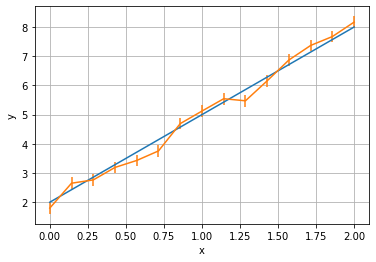

In [237]:
plt.plot(x, y_old)
plt.errorbar(x, y, yerr = yerror)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

In [238]:
datos = np.array([x, y, error])
datos = datos.T
np.savetxt('archivo.txt', datos, fmt = '%f')

In [239]:
data = np.loadtxt('archivo.txt')
x_new = data[:,0]
y_new = data[:,1]
error_new = data[:,2]

In [240]:
def line(x0, a0, b0):
    return a0*x0 + b0

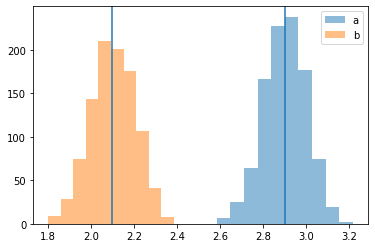

In [241]:
from random import seed
from random import gauss
# seed random number generator
seed(1)
# generate some Gaussian values
a = []
b = []
mu = 2.9
sigma = 0.1
for i in range(1000):
    a.append(gauss(mu, sigma))
    b.append(gauss(2.1, 0.1))
    
plt.hist(a, label = 'a',alpha = 0.5)
plt.hist(b, label = 'b',alpha = 0.5)
plt.legend()
plt.axvline(mu)
plt.axvline(2.1)

a = np.array(a)
b = np.array(b)

In [242]:
data = np.array([a,b])
data[1];

model = line(x_new, 1.2, 1.1)

In [243]:
def chisq(theta,data):
    equis = data[0]
    ye = data[1]
    yerr = data[2]  #Lo que sigue depende del modelo
    model = line(equis, theta[0], theta[1])
    chisq = (ye-model)**2/yerr**2
    return chisq.sum()

In [244]:
chi2 = 0
def chi(a0,b0):
    chi2 = sum(((y_new - (a0*x_new + b0))**2)/error_new**2)
    return chi2


In [245]:
chisquare = np.zeros_like(a)
#chisquare = []
for i in range(len(a)):
    chisquare = chisq((a[i],b[i]),[x_new, y_new, error_new])
    #chisquare.append(chi(a[i],b[i]))

In [246]:
chisquare = np.array(chisquare)
a = np.array(a)
b = np.array(b)

In [247]:
a_best = a[np.where(chisquare == np.min(chisquare))]
b_best = b[np.where(chisquare == np.min(chisquare))]

In [248]:
print(a_best, b_best)

[3.02881848] [2.24494456]
